In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import cross_val_score


boston = pd.read_csv('BostonHousing.csv')
#create our X and y
X = boston.drop('MEDV',axis=1)
y = boston['MEDV'].values

[Here is an article on train, test, and validate datasets](https://machinelearningmastery.com/difference-test-validation-datasets/)

In [ ]:
#Let's try to predict the value from only the number of rooms
X_rooms = X['RM'].values
#Let's transform the data to be ready for regression
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1,1)

X_rooms_train, X_rooms_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.33, random_state=42)

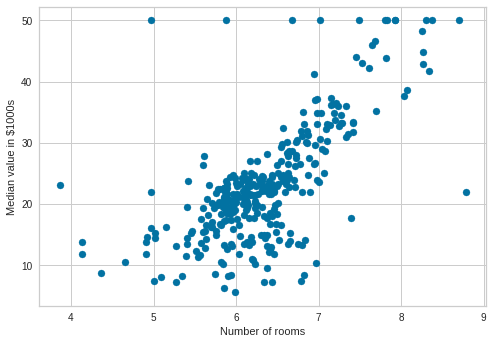

In [ ]:
#Let's plot our data to see if they are linear
plt.scatter(X_rooms_train,y_train)
plt.xlabel('Number of rooms')
plt.ylabel('Median value in $1000s')
plt.show()

In [ ]:
#Let's fit a linear regression model!
linear_model = LinearRegression()
linear_model.fit(X_rooms_train,y_train)

#Let's draw the regression line by predicting y for every value of X
x_range = np.linspace(min(X_rooms_train),max(X_rooms_train)) # generate all possible Xs
x_range = x_range.reshape(-1,1)
y_predictions = linear_model.predict(x_range)

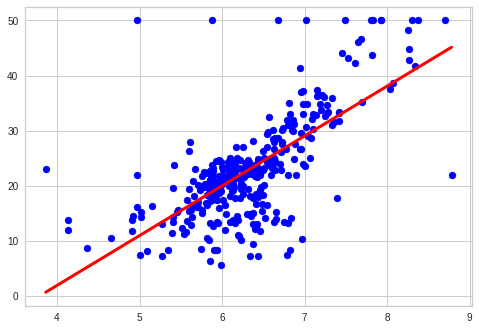

In [ ]:
#Let's plot the regression line
plt.scatter(X_rooms_train, y_train, color='blue')
plt.plot(x_range,y_predictions,color='red',linewidth=3)
plt.show()


In [ ]:
#Let's evaluated the model
# Predict on the test data: y_pred
y_test_pred = linear_model.predict(X_rooms_test)
# Compute and print R^2 and RMSE
print("R^2: {}".format(linear_model.score(X_rooms_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.48345901689194865
Root Mean Squared Error: 6.252283671976981


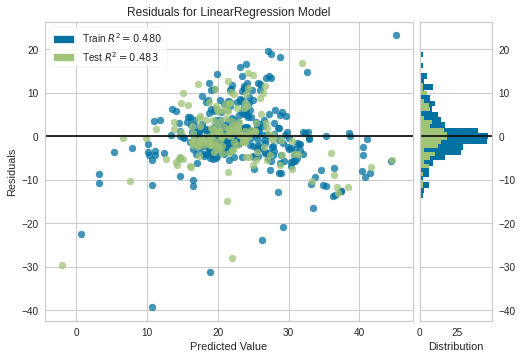

In [ ]:
#Let's plot residuals
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_rooms_train, y_train)
visualizer.score(X_rooms_test, y_test)
visualizer.poof();


In [ ]:
# Let's reload the data and build a more complex model
boston = pd.read_csv('BostonHousing.csv')
#create our X and y
X = boston.drop('MEDV',axis=1)
y = boston['MEDV'].values

In [ ]:
#Let's build our datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Now we are going to simplify our model by choosing a subset of features. This process is known as "feature selection". There are a few techniques to select the best subset of features that lead to the best statsitical model. Although in practice, I have rarely seen them used. [Here is one blog post that covers a few feature selection approaches.](https://www.datacamp.com/community/tutorials/feature-selection-python)
Here is another [notebook that demonstrates forward and backward best subset selection](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html).

Instead we are going to focus on shrinkage methods: models that attempt to shrink the coefficents towards zero.

In [ ]:
#Let's build a Lasso model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


alpha_user = 0.0024420530945486497 #play with alpha and you will get different results (between 0 and 1)
lasso_model = Lasso(alpha=alpha_user,normalize=True)
#ridge_mode = Ridget(alpha= alpha_user, normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_
print(lasso_coef)

[-1.22766063e-01  2.88159589e-02  0.00000000e+00  3.62333818e+00
 -1.43864352e+01  3.78944227e+00 -8.06875986e-03 -1.27179981e+00
  1.26534255e-01 -4.41019792e-03 -8.69327260e-01 -5.73175760e-01]


In [ ]:
#How do we choose the right alpha?
#This is where the validation dataset comes in!
alpha_space = np.logspace(-4, 0, 50)
print(alpha_space)
model_scores = []

lasso_model = Lasso(normalize=True) #same for Ridge
for alpha in alpha_space:

    # Specify the alpha value to use
    lasso_model.alpha = alpha
    
    # Perform 10-fold CV
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    
    # Append the mean of lasso_cv_scores to model_scores = []
    model_scores.append(np.mean(lasso_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(np.max(model_scores))
print(alpha_space[best_alpha_index])

[1.00000000e-04 1.20679264e-04 1.45634848e-04 1.75751062e-04
 2.12095089e-04 2.55954792e-04 3.08884360e-04 3.72759372e-04
 4.49843267e-04 5.42867544e-04 6.55128557e-04 7.90604321e-04
 9.54095476e-04 1.15139540e-03 1.38949549e-03 1.67683294e-03
 2.02358965e-03 2.44205309e-03 2.94705170e-03 3.55648031e-03
 4.29193426e-03 5.17947468e-03 6.25055193e-03 7.54312006e-03
 9.10298178e-03 1.09854114e-02 1.32571137e-02 1.59985872e-02
 1.93069773e-02 2.32995181e-02 2.81176870e-02 3.39322177e-02
 4.09491506e-02 4.94171336e-02 5.96362332e-02 7.19685673e-02
 8.68511374e-02 1.04811313e-01 1.26485522e-01 1.52641797e-01
 1.84206997e-01 2.22299648e-01 2.68269580e-01 3.23745754e-01
 3.90693994e-01 4.71486636e-01 5.68986603e-01 6.86648845e-01
 8.28642773e-01 1.00000000e+00]
0.6852137901954558
0.0024420530945486497
